We explore the titanic data set. 

In [329]:
## some part of this is code from Ge'ron's notebook.



# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import timeit
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [330]:
train_data=pd.read_csv("train.csv")

test_data=pd.read_csv("test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [331]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [332]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


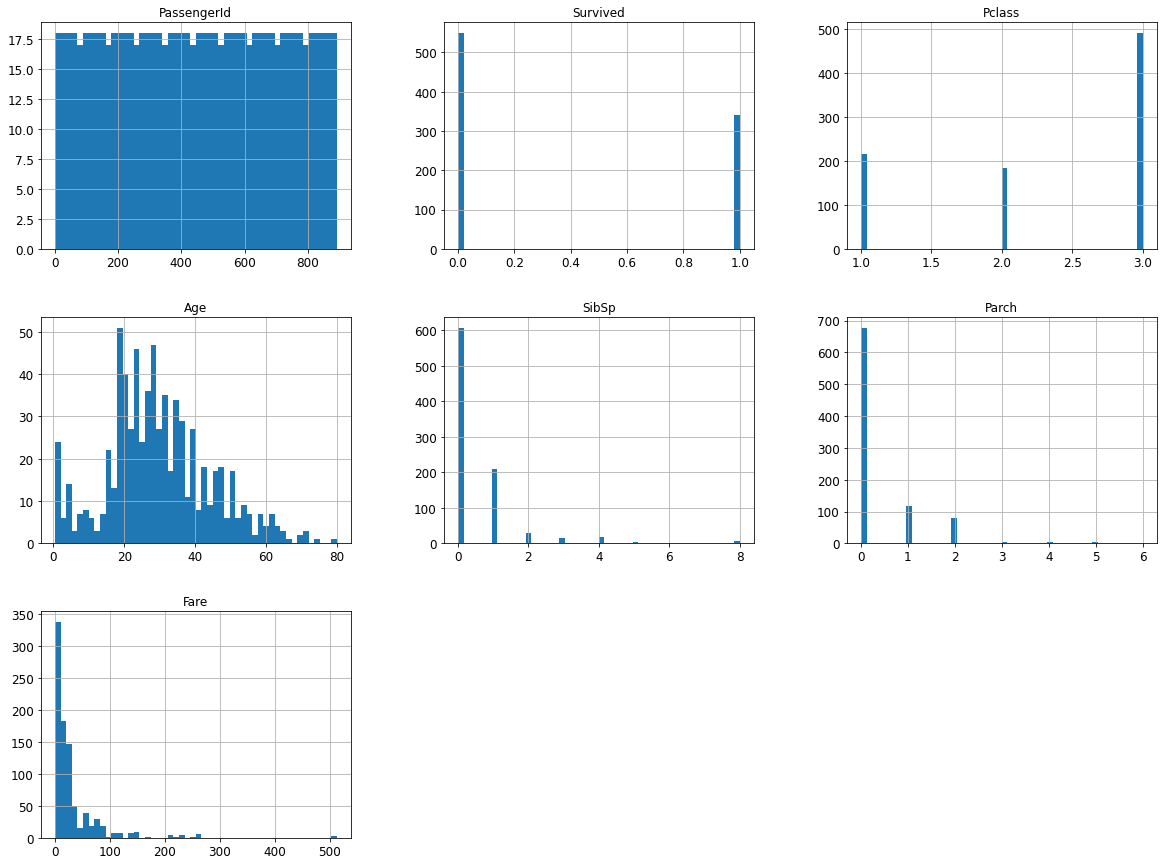

In [333]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [334]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [335]:
train_data.corr()["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [336]:
import copy 

X_train=train_data.drop(["Survived",'PassengerId'],axis=1)
Y_train = np.asarray(train_data["Survived"].copy())

X_test=test_data.drop(['PassengerId'],axis=1)

In [337]:
X_train.columns


Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [338]:
X_train.nunique()

Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [339]:
#missing_val_count_by_column = (original_data.isnull().sum())
#print(missing_val_count_by_column[missing_val_count_by_column > 0])

null_count_by_column=X_train.isnull().sum()
print(null_count_by_column[null_count_by_column > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


We drop "Name" and "Ticket" since they have many different values. One name per each and a lot of Ticket ID.

"Cabin" has many NAN value. So it could be misleading. 

We also need to separate "numerical" columns from "objects". 

In [340]:
X_train_num= X_train.select_dtypes(exclude=['object'])

In [341]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [342]:
X_train_cat = X_train[["Sex","Embarked"]]

In [343]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [344]:
from sklearn.impute import SimpleImputer

num_imputer=SimpleImputer(strategy="median")

In [345]:
X_train_num_imputed=pd.DataFrame(num_imputer.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_train_num_imputed

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000
887,1.0,19.0,0.0,0.0,30.0000
888,3.0,28.0,1.0,2.0,23.4500
889,1.0,26.0,0.0,0.0,30.0000


In [346]:
#make the 'PassengerId' int again!
#X_train_num_imputed = X_train_num_imputed.astype({"PassengerId":np.int64})

In [347]:
X_train_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    float64
 3   Parch   891 non-null    float64
 4   Fare    891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


In [348]:
X_train_num_imputed

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000
887,1.0,19.0,0.0,0.0,30.0000
888,3.0,28.0,1.0,2.0,23.4500
889,1.0,26.0,0.0,0.0,30.0000


In [349]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [350]:
cat_imputer= SimpleImputer(strategy="most_frequent")

In [351]:
#imputed_categories = cat_imputer.fit_transform(X_train_cat)
#type(impued_categories)

In [352]:
X_train_cat_imp=pd.DataFrame(cat_imputer.fit_transform(X_train_cat),columns=X_train_cat.columns,index=X_train_cat.index)
X_train_cat_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  891 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [353]:
from sklearn.preprocessing import OneHotEncoder

cat_1hot_encoder = OneHotEncoder()

X_train_cat_1hot= cat_1hot_encoder.fit_transform(X_train_cat_imp)
X_train_cat_1hot

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [354]:
X_train_cat_1hot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [355]:
X_train_cat_1hot.shape

(891, 5)

In [356]:
cat_1hot_encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [357]:
list(X_train_num)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Making pipelines

In [358]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([('num_imputer',SimpleImputer(strategy="mean")),('std_scalar',StandardScaler())])


cat_pipeline=Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),
                      ('one_hot',OneHotEncoder())])

In [359]:
from sklearn.compose import ColumnTransformer

num_att=list(X_train_num)
cat_att=["Sex","Embarked"]

full_pipline= ColumnTransformer([
                ("numerical",num_pipeline,num_att),
                ("categotical",cat_pipeline,cat_att)
                ])


In [360]:
X_train_prep = full_pipline.fit_transform(X_train) 

In [361]:
X_train_prep.shape
#We can ofcourse make a Dataframe out of it, but not necessary now. 

(891, 10)

In [362]:
Y_train.shape

(891,)

## SGDclassifier

In [363]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=24)

In [364]:
from sklearn.model_selection import cross_val_score,cross_val_predict

cross_val_score(sgd_clf,X_train_prep,Y_train,cv=5,scoring="accuracy")

array([0.78212291, 0.6011236 , 0.76966292, 0.75280899, 0.79775281])

In [365]:
Y_train_sgd_pred= cross_val_predict(sgd_clf,X_train_prep,Y_train,cv=5)

In [366]:
from sklearn.metrics import confusion_matrix,precision_score,precision_recall_curve,recall_score

confusion_matrix(Y_train,Y_train_sgd_pred)

array([[426, 123],
       [108, 234]])

In [367]:
precision_score(Y_train,Y_train_sgd_pred)

0.6554621848739496

In [368]:
recall_score(Y_train,Y_train_sgd_pred)

0.6842105263157895

In [369]:
from sklearn.metrics import roc_curve

Y_scores_sgd = cross_val_predict(sgd_clf,X_train_prep,Y_train,cv=5,method="decision_function")


In [370]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(Y_train, Y_scores_sgd)

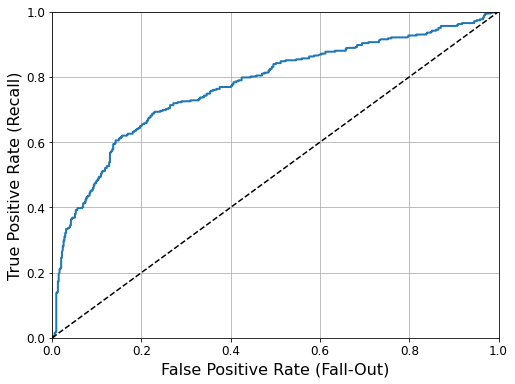

In [371]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

In [372]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train,Y_scores_sgd)

0.7734211058916264

This is really bad!!!

Ok try randomforest

In [373]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=24)
Y_probas_forest = cross_val_predict(forest_clf, X_train_prep, Y_train, cv=5,
                                    method="predict_proba")



Y_scores_forest = Y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train,Y_scores_forest)

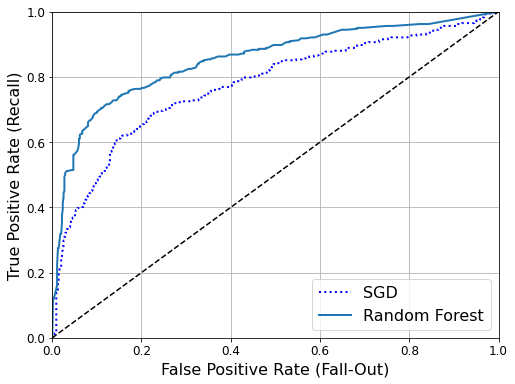

In [374]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [375]:
roc_auc_score(Y_train,Y_scores_forest)

0.8527812396808657

OK. This is better. 

In [376]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf= KNeighborsClassifier(n_neighbors=4, weights='distance')

In [377]:
cross_val_score(kn_clf,X_train_prep,Y_train,cv=5,scoring="accuracy")

array([0.77094972, 0.76404494, 0.83146067, 0.78089888, 0.78651685])

In [378]:
Y_probas_knn = cross_val_predict(kn_clf, X_train_prep, Y_train, cv=5,
                                    method="predict_proba")

Y_scores_knn = Y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train,Y_scores_knn)

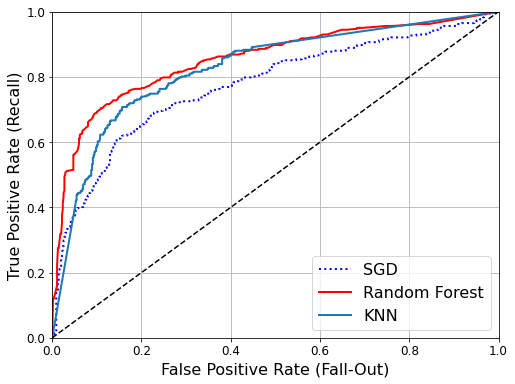

In [379]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, "r-", linewidth=2, label="Random Forest")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [380]:
roc_auc_score(Y_train,Y_scores_knn)

0.8261086078888782

So "Random Forest" is the best.

In [381]:
from sklearn.model_selection import GridSearchCV

par_grid_search=[{'n_estimators':[10,30,90,270], 'criterion':["gini", "entropy"],'random_state':[24]}]

In [382]:
rf_clf=RandomForestClassifier()
grid_search=GridSearchCV(rf_clf,par_grid_search,cv=5,scoring='accuracy',verbose=2)

In [383]:
grid_search.fit(X_train_prep,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...criterion=gini, n_estimators=10, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=30, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=30, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=30, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=30, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=30, random_state=24; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=90, random_state=24; total time=   0.1s
[CV] END ...criterion=gini, n_estimators=90, rand

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [10, 30, 90, 270],
                          'random_state': [24]}],
             scoring='accuracy', verbose=2)

In [384]:
# Let's look at all the performances
cv_res=grid_search.cv_results_
for acc,params in zip(cv_res["mean_test_score"],cv_res["params"]):
    print(acc,params)

0.8002385286548239 {'criterion': 'gini', 'n_estimators': 10, 'random_state': 24}
0.8081036971941498 {'criterion': 'gini', 'n_estimators': 30, 'random_state': 24}
0.8081288054736049 {'criterion': 'gini', 'n_estimators': 90, 'random_state': 24}
0.8159688657334755 {'criterion': 'gini', 'n_estimators': 270, 'random_state': 24}
0.7957818090515347 {'criterion': 'entropy', 'n_estimators': 10, 'random_state': 24}
0.8103383340656581 {'criterion': 'entropy', 'n_estimators': 30, 'random_state': 24}
0.8069863787583955 {'criterion': 'entropy', 'n_estimators': 90, 'random_state': 24}
0.8114744837110036 {'criterion': 'entropy', 'n_estimators': 270, 'random_state': 24}


In [385]:
rf_best_model=grid_search.best_estimator_

In [386]:
X_test_prep = full_pipline.transform(X_test) 

In [387]:
Y_test_predict = rf_best_model.predict(X_test_prep)

In [388]:
Y_test_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [389]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_test_predict})
output.to_csv('ch03_ex03_v1.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
